<a href="https://colab.research.google.com/github/Amayomiee/BigData/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
Flamingo = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/combined-data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Flamingo = Flamingo.rename(columns=lambda x: x.strip()) #removes whitespaces from headers if exists

In [ ]:
#pinkFlam.fillna(pinkFlam.mean(), inplace=True)
print('Samples with Purchases : ' + str(Flamingo['avg_price'].count()) + ' from  the total samples : ' + str(Flamingo['userId'].count())) 

Samples with Purchases : 1411 from  the total samples : 4619


In [ ]:
Flamingo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4619 entries, 0 to 4618
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userId            4619 non-null   int64  
 1   userSessionId     4619 non-null   int64  
 2   teamLevel         4619 non-null   int64  
 3   platformType      4619 non-null   object 
 4   count_gameclicks  4619 non-null   int64  
 5   count_hits        4619 non-null   int64  
 6   count_buyId       1411 non-null   float64
 7   avg_price         1411 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 288.8+ KB


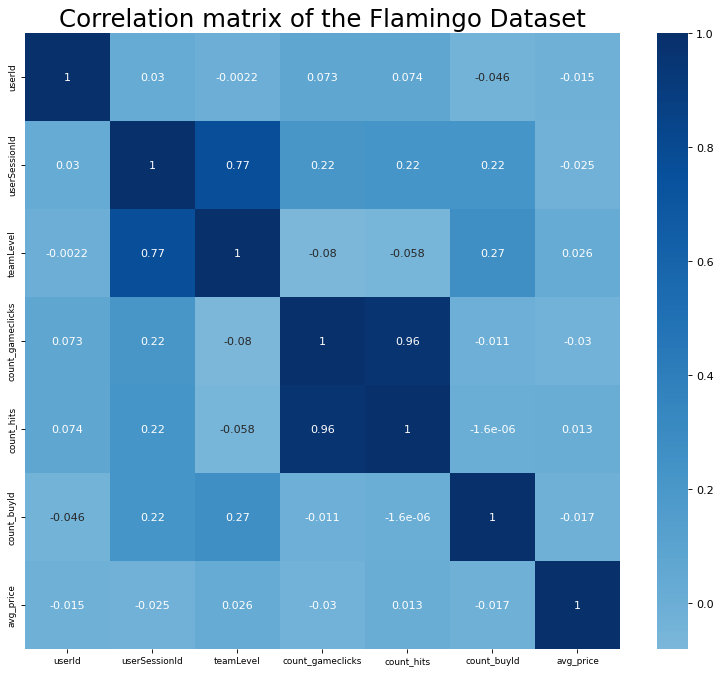

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(Flamingo.corr(), xticklabels=Flamingo.corr().columns, yticklabels=Flamingo.corr().columns, cmap='Blues', center=0, annot=True)

# Decorations
plt.title('Correlation matrix of the Flamingo Dataset', fontsize=22)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [ ]:
import pandas as pd

# Total Clicks per Session
Flamingo['total_clicks_per_session'] = Flamingo.groupby('userSessionId')['count_gameclicks'].transform('sum')

#Total Hits per session
total_hits_per_session = Flamingo.groupby('userSessionId')['count_hits'].transform('sum')

# Average Hits per Click
#average_hits_per_click = total_hits_per_session / Flamingo['count_gameclicks']

In [ ]:
Flamingo['total_hits_per_session'] = total_hits_per_session

In [ ]:
# Summary statistics for the new features
print(Flamingo[['total_clicks_per_session', 'total_hits_per_session']].describe())


       total_clicks_per_session  total_hits_per_session
count               4619.000000             4619.000000
mean                 143.063001               15.705780
std                  126.883397               13.986902
min                    1.000000                0.000000
25%                   70.000000                7.000000
50%                  107.000000               12.000000
75%                  162.500000               19.000000
max                 1207.000000              121.000000


In [ ]:
summary_stats = Flamingo['avg_price'].describe()
print(summary_stats)


count    1411.000000
mean        7.214323
std         6.536501
min         1.000000
25%         2.000000
50%         3.500000
75%        11.250000
max        20.000000
Name: avg_price, dtype: float64


In [ ]:
Flamingo.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price,total_clicks_per_session,total_hits_per_session
0,812,5648,1,android,69,8,NaN,NaN,69,8
1,1658,5649,1,iphone,31,5,NaN,NaN,31,5
2,1589,5650,1,iphone,26,2,NaN,NaN,26,2
3,1863,5651,1,android,35,4,NaN,NaN,35,4
4,937,5652,1,android,39,0,1.0,1.0,39,0


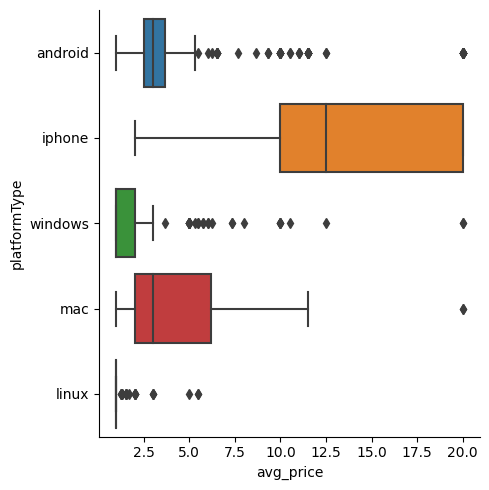

In [ ]:
sns.catplot(x="avg_price",y="platformType",kind='box',data=Flamingo)

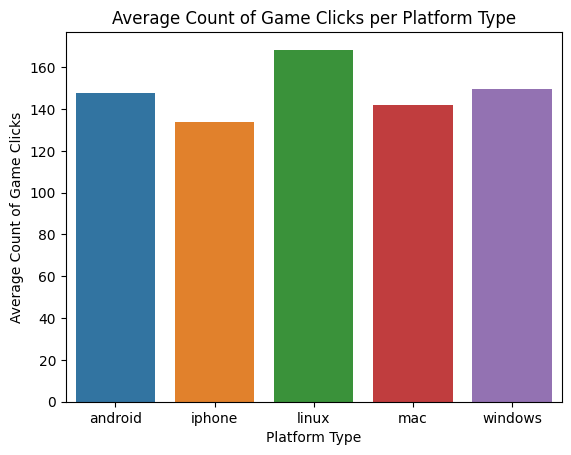

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average count of game clicks per platform type
average_clicks_per_platform = Flamingo.groupby('platformType')['count_gameclicks'].mean()

# Create a bar plot
sns.barplot(x=average_clicks_per_platform.index, y=average_clicks_per_platform.values)

# Set the x-axis and y-axis labels
plt.xlabel('Platform Type')
plt.ylabel('Average Count of Game Clicks')
plt.title('Average Count of Game Clicks per Platform Type')

# Display the plot
plt.show()



In [ ]:
import pandas as pd

# Group the data by 'teamLevel' and calculate the count of instances of 'count_buyId'
buyid_counts = Flamingo.groupby('teamLevel')['count_buyId'].count()

# Display the count of instances of 'count_buyId' for each 'teamLevel'
print(buyid_counts)


teamLevel
1     80
2    109
3    146
4    204
5    266
6    303
7    303
8      0
Name: count_buyId, dtype: int64


In [ ]:
Flamingo.replace("", np.nan, inplace=True)
Flamingo = Flamingo[np.isfinite(Flamingo['count_buyId'])]
Flamingo['user_category'] = np.where(Flamingo['avg_price']> 4, 'TopSpenders', 'BottomSpenders')
Flamingo.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price,total_clicks_per_session,total_hits_per_session,user_category
4,937,5652,1,android,39,0,1.0,1.0,39,0,BottomSpenders
11,1623,5659,1,iphone,129,9,1.0,10.0,129,9,TopSpenders
13,83,5661,1,android,102,14,1.0,5.0,102,14,TopSpenders
17,121,5665,1,android,39,4,1.0,3.0,39,4,BottomSpenders
18,462,5666,1,android,90,10,1.0,3.0,90,10,BottomSpenders


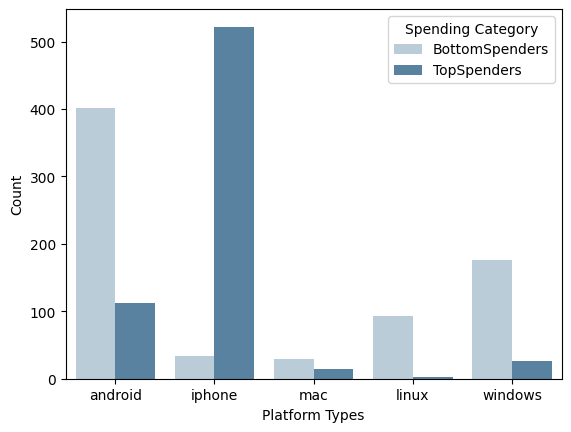

In [ ]:
# Define the color palette
color_palette = sns.color_palette("Blues", n_colors=2, desat=0.7)

sns.countplot(x="platformType", hue="user_category", data=Flamingo, palette=color_palette)

# Set the x-axis and y-axis labels
plt.xlabel('Platform Types')
plt.ylabel('Count')

# Set the legend title
plt.legend(title='Spending Category')

# Display the plot
plt.show()

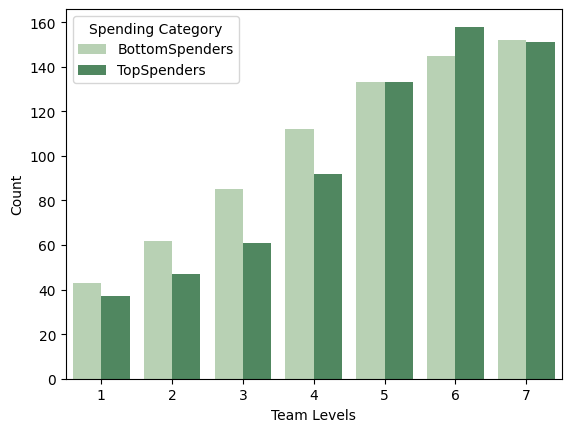

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette
color_palette = sns.color_palette("Greens", n_colors=2, desat=0.7)

# Create the countplot with the specified color palette
sns.countplot(x="teamLevel", hue="user_category", data=Flamingo, palette=color_palette)

# Set the x-axis and y-axis labels
plt.xlabel('Team Levels')
plt.ylabel('Count')

# Set the legend title
plt.legend(title='Spending Category')

# Display the plot
plt.show()
